In [1]:
from rbibm.utils.utils_data import query, query_main, remove_entry_by_id, query_rob_metric, get_model_by_idx
from rbibm.plots.multi_plots import multi_plot
from rbibm.plots.metric_plots import plot_by_num_simulations, plot_expected_coverage, plot_approximation_metric, plot_rob_tolerance_plot
from rbibm.plots.sweep_plots import plot_mulitobjective_paretto_front
from rbibm.plots.main_plots import plot_posterior, plot_adversarial_posterior, plot_posterior_predictive, plot_adversarial_posterior_predictive
from rbibm.plots.styles import use_style

import matplotlib.pyplot as plt 

import torch 
import numpy as np

In [2]:
base_fig_size = 1.75

In [3]:
torch.manual_seed(0)

In [4]:
np.random.seed(0)

In [18]:
name="benchmark"
idxs_final = []
id1 = query_main(name, defense = "L2PGDrKLTrades", params_defense_eps=0.1, N_train=100000, model_name="maf", task="gaussian_linear")
id2 = query_main(name, defense = "L2PGDrKLTrades", params_defense_eps=0.5, N_train=100000, model_name="maf", task="sir")
id3 = query_main(name, defense = "L2PGDrKLTrades", params_defense_eps=0.5, N_train=100000, model_name="maf", task="lotka_volterra")
id4 = query_main(name, defense = "L2PGDrKLTrades", params_defense_eps=0.5, N_train=100000, model_name="maf", task="hudgkin_huxley")
id5 = query_main(name, defense = "L2PGDrKLTrades", params_defense_eps=0.1, N_train=100000, model_name="maf", task="vae_task")
id6 = query_main(name, defense = "L2PGDrKLTrades", params_defense_eps=0.5, N_train=100000, model_name="maf", task="spatial_sir")

idxs_final.extend([id1.id.iloc[0],id2.id.iloc[0],id3.id.iloc[0],id4.id.iloc[0],id5.id.iloc[0],id6.id.iloc[0]])

In [19]:
colors = ["#08519c", "#d94801"]

Following data row is used:
Id: 0455b3e9-9bdb-43e1-a91b-a2d51e52d8ef, Task: lotka_volterra, Model: maf, Defense: L2PGDrKLTrades, Loss: NLLLoss, N_train: 100000, Id adversarial =2f7e0caa-36ba-4c29-b6b0-ac5e407d90d1, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_473433/2526355610.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("lotka_volterra_predicitive.svg", bbox="tight", transparent=True)


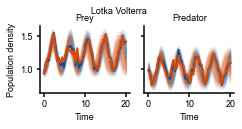

In [20]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior_predictive(name, task="lotka_volterra", 
                                                      model_name="maf", eps=2., idx_adv_example=0, N_train=100000, 
                                                      id=idxs_final, metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", 
                                                      plotting_kwargs={"colors": colors, "markersize": 2., "lw":2., "figsize":(base_fig_size*2,base_fig_size)})
    fig.suptitle("Lotka Volterra")
    fig.savefig("lotka_volterra_predicitive.svg", bbox="tight", transparent=True)
    plt.show()

Following data row is used:
Id: 0455b3e9-9bdb-43e1-a91b-a2d51e52d8ef, Task: lotka_volterra, Model: maf, Defense: L2PGDrKLTrades, Loss: NLLLoss, N_train: 100000, Id adversarial =2f7e0caa-36ba-4c29-b6b0-ac5e407d90d1, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_473433/476173722.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("lotka_volterra_posterior.svg", bbox="tight", transparent=True)


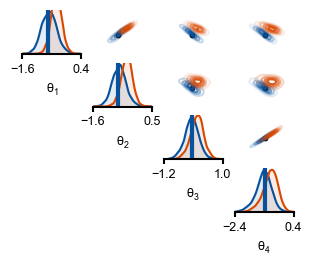

In [21]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="lotka_volterra", model_name="maf", eps=2., idx_adv_example=0, id=idxs_final,
                                           N_train=100000, n_samples=10000, metric_rob="ReverseKLRobMetric",attack="L2PGDAttack",
                                           plotting_kwargs={"colors":colors, "bins": 100,"labels":[r"$\theta_1$", r"$\theta_2$",r"$\theta_3$",r"$\theta_4$"], "figsize":(2*base_fig_size, 1.5*base_fig_size)})
    fig.savefig("lotka_volterra_posterior.svg", bbox="tight", transparent=True)
    plt.show()

Following data row is used:
Id: a74b1a54-301b-4650-95d2-a7b185d263b4, Task: sir, Model: maf, Defense: L2PGDrKLTrades, Loss: NLLLoss, N_train: 100000, Id adversarial =7d9e090a-aaa7-49ae-a938-de41536ac002, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_473433/3984441201.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("sir_predictive.svg", bbox="tight", transparent=True)


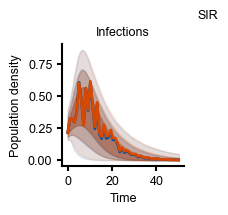

In [22]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior_predictive(name, task="sir", model_name="maf", eps=0.2,id=idxs_final, idx_adv_example=0, N_train=100000, metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", plotting_kwargs={"colors": colors, "all_states":False, "figsize": (0.9*base_fig_size,0.9*base_fig_size)})
    fig.suptitle("SIR", y=1.1, x=1.05)
    fig.savefig("sir_predictive.svg", bbox="tight", transparent=True)
    plt.show()

Following data row is used:
Id: a74b1a54-301b-4650-95d2-a7b185d263b4, Task: sir, Model: maf, Defense: L2PGDrKLTrades, Loss: NLLLoss, N_train: 100000, Id adversarial =7d9e090a-aaa7-49ae-a938-de41536ac002, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_473433/3108058566.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("sir_posterior.svg", bbox="tight", transparent=True)


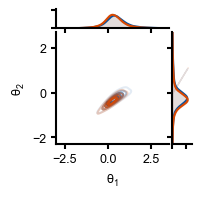

In [23]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="sir", model_name="maf", eps=0.2, idx_adv_example=0, N_train=100000, id=idxs_final,
    metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", n_samples=50000, type="2djointplot", 
    plotting_kwargs={"bins":200, "figsize":(base_fig_size,base_fig_size), "colors": colors, "labels":[r"$\theta_1$", r"$\theta_2$"]})
    fig.savefig("sir_posterior.svg", bbox="tight", transparent=True)
    plt.show()

Following data row is used:
Id: e71196a1-2369-4197-9e0e-be24d0b5b022, Task: vae_task, Model: maf, Defense: L2PGDrKLTrades, Loss: NLLLoss, N_train: 100000, Id adversarial =22693daf-34f4-48ee-b571-7201958bff3c, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_473433/2566776227.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("vae_predictive.svg", bbox="tight", transparent=True)


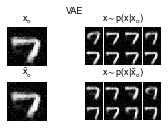

In [11]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior_predictive(name, task="vae_task", model_name="maf", eps=2., id=idxs_final,
    idx_adv_example=2, N_train=100000, metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", 
    plotting_kwargs={"n_samples":8, "nrow":4,"titles":[[r"$x_o$", r"$x \sim p(x|x_o)$"], [r"$\tilde{x}_o$",r"$x \sim p(x|\tilde{x}_o)$"]], "figsize":(2*base_fig_size, base_fig_size), "grid_spec_width_ratios": (1,1), "grid_padding": 1})
    fig.suptitle("VAE")
    plt.subplots_adjust(wspace=-.3, hspace=.4)
    fig.savefig("vae_predictive.svg", bbox="tight", transparent=True)
    plt.show()

Following data row is used:
Id: e71196a1-2369-4197-9e0e-be24d0b5b022, Task: vae_task, Model: maf, Defense: L2PGDrKLTrades, Loss: NLLLoss, N_train: 100000, Id adversarial =22693daf-34f4-48ee-b571-7201958bff3c, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_473433/929124894.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("vae_posterior.svg", bbox="tight", transparent=True)


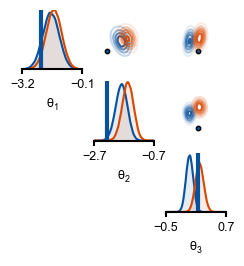

In [12]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="vae_task", model_name="maf", eps=2., id=idxs_final,
                                           idx_adv_example=2, N_train=100000, n_samples=100000, 
                                           metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", 
                                           plotting_kwargs={"colors":colors, "bins": 100, "figsize": (1.5*base_fig_size, 1.5*base_fig_size),"labels":[r"$\theta_1$", r"$\theta_2$",r"$\theta_3$"]})
    fig.savefig("vae_posterior.svg", bbox="tight", transparent=True)
    plt.show()

Following data row is used:
Id: 57bc50a2-6a5f-4352-aba6-c96590e49831, Task: spatial_sir, Model: maf, Defense: L2PGDrKLTrades, Loss: NLLLoss, N_train: 100000, Id adversarial =c28d85e4-a37a-481a-80af-e35d2a224f5b, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_473433/2777018660.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("spatial_sir_predictive.svg", bbox="tight", transparent=True)


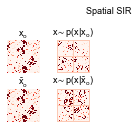

In [13]:
with use_style("pyloric"):
    torch.manual_seed(3)
    fig, axes = plot_adversarial_posterior_predictive(name, task="spatial_sir", model_name="maf", eps=2., id=idxs_final,
                                                      idx_adv_example=2, N_train=100000, metric_rob="ReverseKLRobMetric", 
                                                      attack="L2PGDAttack",
                                                      plotting_kwargs={"n_samples":4, "grid_pad_value":0.2, "grid_padding":2, "pad_label":0, "grid_spec_width_ratios": (1,1), "nrow":2, "figsize":(1.2*base_fig_size,0.9*base_fig_size), "titles":[[r"$x_o$", r"$x \sim p(x|x_o)$"], [r"$\tilde{x}_o$",r"$x \sim p(x|\tilde{x}_o)$"]]})
    plt.subplots_adjust(hspace=0.5, wspace=-0.4)
    fig.suptitle("Spatial SIR", y=1.1, x=0.9)
    fig.savefig("spatial_sir_predictive.svg", bbox="tight", transparent=True)
    plt.show()

Following data row is used:
Id: 57bc50a2-6a5f-4352-aba6-c96590e49831, Task: spatial_sir, Model: maf, Defense: L2PGDrKLTrades, Loss: NLLLoss, N_train: 100000, Id adversarial =c28d85e4-a37a-481a-80af-e35d2a224f5b, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_473433/1819361710.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("spatial_sir_posterior.svg", bbox="tight", transparent=True)


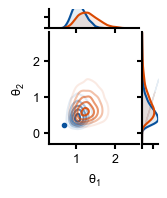

In [14]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="spatial_sir", model_name="maf", eps=2., idx_adv_example=2, id=idxs_final,
                                           N_train=100000, 
                                           metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", 
                                           n_samples=10000, type="2djointplot", 
                                           plotting_kwargs={"bins":200, "colors": colors, "labels":[r"$\theta_1$", r"$\theta_2$"], "figsize":(base_fig_size*0.8, base_fig_size)})
    fig.savefig("spatial_sir_posterior.svg", bbox="tight", transparent=True)
    plt.show()

In [15]:
torch.manual_seed(1)

Following data row is used:
Id: 229eeee2-8b32-4314-ae6c-78fb48379967, Task: hudgkin_huxley, Model: maf, Defense: L2PGDrKLTrades, Loss: NLLLoss, N_train: 100000, Id adversarial =efb2dfd9-9ca4-4905-867e-fdab56c90e11, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_473433/2124398702.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("hh_predictive.svg", bbox="tight", transparent=True)


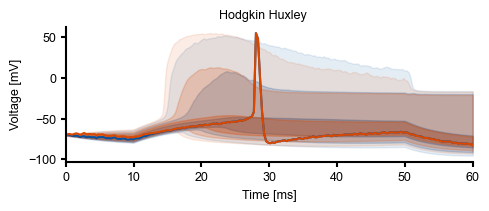

In [16]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior_predictive(name, task="hudgkin_huxley", 
                                                      model_name="maf", eps=1., idx_adv_example=108, N_train=100000, id=idxs_final,
                                                      metric_rob="ReverseKLRobMetric", attack="L2PGDAttack",
                                                      plotting_kwargs={"colors":colors,"samples_to_plot":0, "lw":1.5, "n_samples": 100000, "figsize":(3*base_fig_size, base_fig_size)})
    fig.suptitle("Hodgkin Huxley")
    fig.savefig("hh_predictive.svg", bbox="tight", transparent=True)
    plt.show()

Following data row is used:
Id: 229eeee2-8b32-4314-ae6c-78fb48379967, Task: hudgkin_huxley, Model: maf, Defense: L2PGDrKLTrades, Loss: NLLLoss, N_train: 100000, Id adversarial =efb2dfd9-9ca4-4905-867e-fdab56c90e11, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


/tmp/ipykernel_473433/3660968941.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("hh_posterior.svg", bbox="tight", transparent=True)


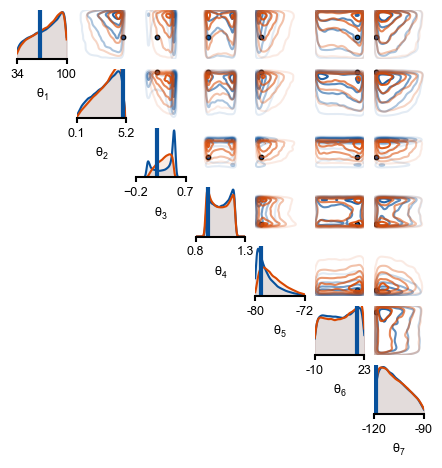

In [17]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="hudgkin_huxley", model_name="maf", eps=1., idx_adv_example=108,id=idxs_final,
    N_train=100000, n_samples=50000, metric_rob="ReverseKLRobMetric", attack="L2PGDAttack", 
    plotting_kwargs={"colors":colors, "figsize":(3*base_fig_size,3*base_fig_size), "bins":100,"labels":[r"$\theta_1$", r"$\theta_2$",r"$\theta_3$",r"$\theta_4$",r"$\theta_5$",r"$\theta_6$",r"$\theta_7$"], "jitter":1e-2})
    axes[0,0].set_xticklabels([34,100])
    axes[4,4].set_xticklabels([-80,-72])
    axes[5,5].set_xticklabels([-10,23])
    axes[6,6].set_xticklabels([-120,-90])
    fig.savefig("hh_posterior.svg", bbox="tight", transparent=True)
    plt.show()